### **Orthogonal** **Projections** 

In [5]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [6]:
from sklearn.datasets import fetch_olivetti_faces, fetch_lfw_people
from ipywidgets import interact
%matplotlib inline
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces()
faces = dataset.data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [7]:
import numpy.testing as np_test
def test_property_projection_matrix(P):
    """Test if the projection matrix satisfies certain properties.
    In particular, we should have P @ P = P, and P = P^T
    """
    np_test.assert_almost_equal(P, P @ P)
    np_test.assert_almost_equal(P, P.T)

def test_property_projection(x, p):
    """Test orthogonality of x and its projection p."""
    np_test.assert_almost_equal(np.dot(p-x, p), 0)

In [8]:
def projection_matrix_1d(b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    D, = b.shape
    P = b.reshape(-1, 1) * b / np.linalg.norm(b) ** 2 
    return P


def project_1d(x, b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        x: the vector to be projected
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        y: projection of x in space spanned by b
    """
    
    p = projection_matrix_1d(b) @ x 
    return p


def projection_matrix_general(B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    P = B @ np.linalg.inv(B.T @ B) @ B.T 

    return P


def project_general(x, B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
        B: ndarray of dimension (D, E), the basis for the subspace
    
    Returns:
        y: projection of x in space spanned by b
    """
    p = projection_matrix_general(B) @ x 
    return p

In [9]:
# Orthogonal projection in 2d
# define basis vector for subspace
b = np.array([2,1]).reshape(-1,1)
# point to be projected later
x = np.array([1,2]).reshape(-1, 1)

In [10]:
# Test 1D
np_test.assert_almost_equal(projection_matrix_1d(np.array([1, 2, 2])), 
                            np.array([[1,  2,  2],
                                      [2,  4,  4],
                                      [2,  4,  4]]) / 9)

np_test.assert_almost_equal(project_1d(np.ones(3),
                                       np.array([1, 2, 2])),
                            np.array([5, 10, 10]) / 9)

B = np.array([[1, 0],
              [1, 1],
              [1, 2]])

# Test General
np_test.assert_almost_equal(projection_matrix_general(B), 
                            np.array([[5,  2, -1],
                                      [2,  2,  2],
                                      [-1, 2,  5]]) / 6)

np_test.assert_almost_equal(project_general(np.array([6, 0, 0]), B), 
                            np.array([5, 2, -1]))
print('correct')

correct


## **2. Eigenfaces**

In [11]:

from sklearn.datasets import olivetti_faces, fetch_lfw_people
from ipywidgets import interact
%matplotlib inline
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces()
faces = dataset.data


faces = faces.reshape(400,64,64)
faces.shape
np.save("Eigenface.npy", faces)

In [12]:
mean = faces.mean(axis=0)
std = faces.std(axis=0)
faces_normalized = (faces - mean) / std

In [13]:
B = np.load('Eigenface.npy')[:50] # we use the first 50 dimensions of the basis, you should play around with the dimension here.
print("the eigenfaces have shape {}".format(B.shape))

the eigenfaces have shape (50, 64, 64)


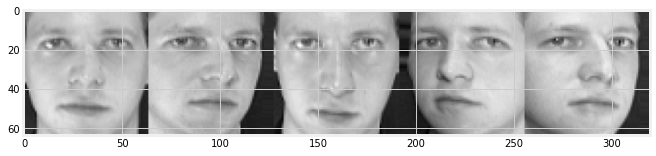

In [14]:

plt.figure(figsize=(10,10))
plt.imshow(np.hstack(B[:5]), cmap='gray');

In [40]:
@interact(i=(0, 50))
def show_eigenface_reconstruction(i):
    original_face = faces_normalized[i].reshape(64, 64)
    B_basis = B[i].reshape(64,64)
    face_reconstruction = project_general(original_face, B_basis)
    plt.figure()
    plt.imshow(np.hstack([original_face, face_reconstruction]), cmap='gray')
    plt.show()
   

interactive(children=(IntSlider(value=25, description='i', max=50), Output()), _dom_classes=('widget-interact'…

<Figure size 432x288 with 0 Axes>

## **Least square for predicting Boston housing prices**

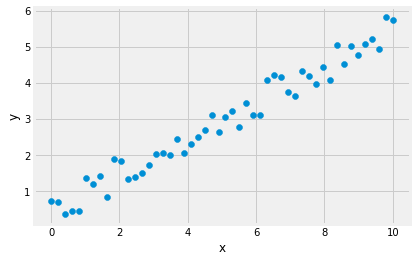

In [41]:
x = np.linspace(0, 10, num=50)

random = np.random.RandomState(42)  
theta = random.randn()             
y = theta * x + random.rand(len(x)) 

plt.scatter(x, y);
plt.xlabel('x');
plt.ylabel('y');

In [42]:
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

theta_hat = np.linalg.solve(X.T @ X, X.T @ Y)

theta = 0.496714
theta_hat = 0.566442


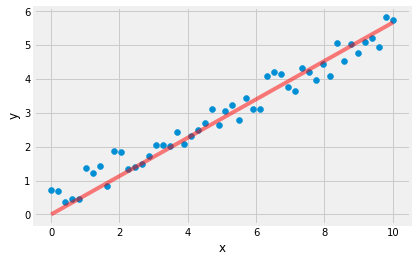

In [43]:
fig, ax = plt.subplots()
ax.scatter(x, y);
xx = [0, 10]
yy = [0, 10 * theta_hat[0,0]]
ax.plot(xx, yy, 'red', alpha=.5);
ax.set(xlabel='x', ylabel='y');
print("theta = %f" % theta)
print("theta_hat = %f" % theta_hat)

In [44]:
N = np.arange(10, 10000, step=10)

In [45]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_X, boston_y = boston.data, boston.target
print("The housing dataset has size {}".format(boston_X.shape))
print("The prices has size {}".format(boston_X.shape))

boston_theta_hat = np.zeros(3)

The housing dataset has size (506, 13)
The prices has size (506, 13)
